## DTs and CV Lecture 8 Marisol De La Cruz

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

## Work Period 8 Questions ##

> 1. If you haven’t already, create a Jupyter notebook with the code from lecture 7.


In [278]:
data = pd.read_csv('student-por.csv',sep=';')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [279]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [280]:
df_info = data.info()  # Shows data types values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [281]:
len(data)

649

In [282]:
# Identify numerical variables
numeric_columns = data.select_dtypes(include=['int64']).columns.tolist()

# Identify categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Binary variables (these are categorical with only two unique values)
binary_columns = [col for col in categorical_columns if data[col].nunique() == 2]

# Print the results
print(f"\033[1mNumerical Variables:\033[0m")  # Bold for "Numerical Variables"
print(numeric_columns)

print(f"\033[1mCategorical Variables:\033[0m")  # Bold for "Categorical Variables"
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")
print(f"\033[1mBinary Variables:\033[0m")  # Bold for "Binary Variables"
print(binary_columns)

# Calculate the summary

num_numerical = len(numeric_columns)
num_categorical = len(categorical_columns)
num_binary = len(binary_columns)

# Display the summary
print(f"\033[1mSummary of Variables:\033[0m")  # Bold for "Numerical Variables"
# Print the summary with bold formatting for section titles (ANSI escape codes)
print(f"\033[1mNumerical Variables:\033[0m")  # Bold for "Numerical Variables"
print(f"Count: {num_numerical}")

print(f"\033[1mCategorical Variables:\033[0m")  # Bold for "Categorical Variables"
print(f"Count: {num_categorical}\n")

print(f"\033[1mBinary Variables:\033[0m")  # Bold for "Binary Variables"
print(f"Count: {num_binary} (these are also included in categorical, as they have 'yes'/'no' values)\n")


Numerical Variables:
['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
Categorical Variables:
school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']
Binary Variables:
['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Summary of Variables:
Numerical Variables:
Count: 16
Categorical Variables:
Count: 17

Binary Variables:
Count: 13 (these are also included in categorical, as they have 'yes'/'

In [283]:
# Function to convert categorical columns to numeric codes
def convert_categorical_to_codes(df):
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.to_list()
    
    # Using a try-except block to handle potential issues
    for col in categorical_cols:
        try:
            # Convert categorical column to category type and then to codes
            df[col] = df[col].astype('category').cat.codes
        except Exception as e:
            print(f"Error converting column '{col}': {e}")
    
    return df

# Convert categorical columns in the DataFrame
data = convert_categorical_to_codes(data)

# Display the updated DataFrame
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,4,15,15,16
646,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,1,5,6,11,12,9
647,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,6,10,10,10


In [284]:
#creating a new grade col
data['grade'] = data['G1'] + data['G2'] + data['G3']
data['pass'] = [(1 if data['G1'][x]+data['G2'][x]+data['G3'][x] >= 35 else 0) for x in range(len(data))]
data.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)


In [285]:
data = data.sort_values(by=['grade'], ascending=False)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grade,pass
338,0,0,17,0,1,1,3,1,3,2,...,0,3,1,2,1,1,3,0,56,1
617,1,0,18,1,1,1,1,1,0,3,...,0,5,3,2,1,1,4,0,54,1
349,0,0,17,1,0,1,3,2,1,1,...,0,5,2,2,1,2,5,0,54,1
594,1,0,18,1,0,1,4,4,4,4,...,0,4,3,5,1,2,1,0,54,1
636,1,1,18,1,0,1,4,4,4,4,...,0,3,2,4,1,4,2,4,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,1,1,17,1,0,1,2,2,2,2,...,1,1,2,1,2,3,5,0,7,0
440,1,1,16,1,0,1,1,1,0,3,...,1,5,4,5,4,5,3,0,7,0
603,1,0,18,0,1,0,4,2,4,2,...,1,5,3,1,1,1,5,0,5,0
605,1,0,19,1,0,1,1,1,0,3,...,0,5,5,5,2,3,2,0,5,0


In [286]:
# Split the dataset into training and testing sets based on index (first 500 rows for training)
train = data.iloc[:500].copy() 
test = data.iloc[500:].copy()  

final_train_features = train.drop(columns=['grade', 'pass'])  
final_train_labels = train['pass']  # Target label: 'pass'

final_test_features = test.drop(columns=['grade', 'pass'])  
final_test_labels = test['pass']  # Target label: 'pass'

#Display the sizes of training and testing sets
print(f"Training set size: {final_train_features.shape[0]} rows")
print(f"Testing set size: {final_test_features.shape[0]} rows")

Training set size: 500 rows
Testing set size: 149 rows


In [287]:
train_dataset = data.sample(frac=0.8, random_state=0)
test_dataset = data.drop(train_dataset.index)  # Ensures non-overlapping test set

train_features = train_dataset.drop(columns=['grade', 'pass'])  
train_labels = train_dataset['pass'] 

test_features = test_dataset.drop(columns=['grade', 'pass'])  
test_labels = test_dataset['pass']  


In [288]:
#creating a model using unshuffled data
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

In [289]:
# fitting and predicting
model.fit(final_train_features, final_train_labels)
prediction = model.predict(final_test_features)

In [290]:
# using cross validation
scores = cross_val_score(model, final_train_features, final_train_labels, cv=5, scoring='accuracy')
print(f"The accuracies are {scores} and the average accuracy is {scores.mean()}")
print(f"The standard deviation is {scores.std()*2}")

The accuracies are [0.7  0.69 0.66 0.66 0.68] and the average accuracy is 0.678
The standard deviation is 0.03199999999999994


In [291]:
# carrying out hyper parameters tunning on the shuffled data
max_depth = [3,4,5,15]
score_frame = {}
score_frame['max_depth'] = []
score_frame['min_samples_split'] = []
score_frame['accuracy'] = []
for i in max_depth:
    for j in range(2,50, 4):
        model = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=1, min_samples_split = j)
        model.fit(train_features, train_labels)
        accuracy = accuracy_score(model.predict(test_features), test_labels)
        score_frame['max_depth'].append(i)
        score_frame['min_samples_split'].append(j)
        score_frame['accuracy'].append(accuracy)

In [292]:
# converting scores to a dataframe
score_frame = pd.DataFrame(score_frame)
score_frame

,max_depth,min_samples_split,accuracy
0,3,2,0.676923
1,3,6,0.676923
2,3,10,0.676923
3,3,14,0.676923
4,3,18,0.676923
5,3,22,0.676923
6,3,26,0.676923
7,3,30,0.676923
8,3,34,0.676923
9,3,38,0.676923


In [293]:
# checking the highest accuracy
highest = score_frame[score_frame['accuracy'] == score_frame['accuracy'].max()]
highest

,max_depth,min_samples_split,accuracy
46,15,42,0.715385


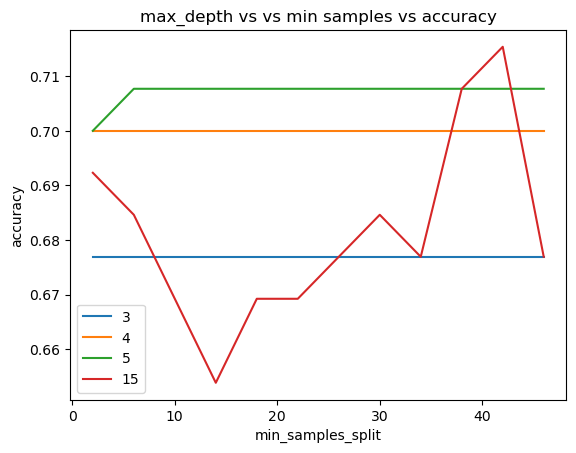

In [294]:
# plotting each accuracy for each max depth
for i in max_depth:
    depth = score_frame[score_frame['max_depth'] == i]
    plt.plot(depth['min_samples_split'], depth['accuracy'])
plt.legend(max_depth)
plt.xlabel('min_samples_split')
plt.ylabel('accuracy')
plt.title('max_depth vs vs min samples vs accuracy')
plt.show()